# Penulisan Ilmiah - [System Recommendation] 
 
#### Perancangan Sistem Rekomendasi Jurusan Menggunakan Neural Network Berdasarkan Nilai Akademik Siswa dengan Pendekatan CRISP-DM


> Dataset : 📚 High Schools Student Grades 📚

- **Name    :** Ahmad Zaky Humami
- **NPM     :** 50422138
- **Kelas   :** 3IA27


## Project Overview

> Pemilihan jurusan perguruan tinggi merupakan keputusan krusial bagi setiap siswa SMA, namun sering kali masih didasarkan pada intuisi atau informasi yang terbatas. Dengan volume data nilai akademik yang besar dan kompleksitas kombinasi mata pelajaran, siswa dan konselor membutuhkan alat bantu yang objektif untuk menilai kecocokan jurusan. Proyek ini bertujuan mengembangkan Sistem Rekomendasi Jurusan Berbasis Neural Network menggunakan pendekatan CRISP‑DM, yang memproses data rapor siswa (core subjects dan elective IPA/IPS) untuk menghasilkan daftar jurusan Universitas Gunadarma yang paling sesuai dengan profil akademik setiap individu.

Mengapa Masalah Ini Harus Diselesaikan?
- Peningkatan Akurasi Rekomendasi Jurusan
> Dengan memanfaatkan pola non‑linier dalam nilai rapor, sistem mampu memberikan rekomendasi jurusan yang lebih tepat dibandingkan pendekatan manual atau linier sederhana.
- Pendampingan Karir Berbasis Data
> Memberikan insight personal untuk siswa dan konselor, sehingga proses penentuan jalur studi lebih terarah dan meminimalkan risiko salah pilih jurusan.
- Efisiensi Layanan Bimbingan
> Konselor dan pihak sekolah dapat memproses ribuan profil siswa secara otomatis, menghemat waktu dan sumber daya dalam sesi bimbingan akademik.
- Dasar Pengambilan Keputusan Institusional

## Business Understanding
### Problem Statements
> Sistem Rekomendasi Jurusan ini dirancang untuk membantu siswa dan konselor dalam menentukan pilihan jurusan universitas yang paling sesuai dengan profil akademik mereka. Dengan volume dan kompleksitas data nilai rapor (core subjects dan elective IPA/IPS), dibutuhkan mekanisme rekomendasi yang dapat menyajikan opsi jurusan secara otomatis dan personal.

1. Bagaimana cara menyiapkan dan mengolah data nilai rapor siswa (core & elective) secara optimal agar siap pakai untuk membangun model rekomendasi jurusan yang akurat?
2. Bagaimana merancang dan melatih model Neural Network yang mampu merekomendasikan daftar jurusan Universitas Gunadarma dengan probabilitas tinggi berdasarkan profil nilai akademik siswa?

### Goals
1. Menyusun pipeline preprocessing data (imputasi, normalisasi, encoding) yang efektif untuk menghasilkan fitur berkualitas bagi sistem rekomendasi jurusan.
2. Mengembangkan dan menguji model Neural Network berbasis CRISP‑DM yang dapat menghasilkan rekomendasi top‑K jurusan bagi setiap siswa dengan akurasi dan relevansi tinggi.

## Data Understanding

### Import Library

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import shap
from lime.lime_tabular import LimeTabularExplainer
import joblib

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model # type: ignore
from tensorflow.keras.layers import Dense, Dropout, Input # type: ignore
from tensorflow.keras.callbacks import EarlyStopping # type: ignore
from tensorflow.keras import utils # type: ignore
from tensorflow.keras.optimizers import Adam, RMSprop  # type: ignore

from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasClassifier

%matplotlib inline

import warnings
warnings.filterwarnings("ignore") 

c:\Data Central\Documents\Penulisan Ilmiah Zaky\Project\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Load Dataset

In [2]:
df_student = 'Datasets/student_grades_5000.csv'
df_major = 'Datasets/ug_majors.csv'

df_student = pd.read_csv(df_student)
df_major = pd.read_csv(df_major)

### Deskripsi Variables

#### Dataset Student Grades

| Variabel               | Keterangan                                                         |
| ---------------------- | ------------------------------------------------------------------ |
| `student_id`           | ID unik setiap siswa, format “S00001” hingga “S05000”              |
| `track`                | Jalur peminatan siswa: “IPA” atau “IPS”                            |
| **Core Subjects**      |                                                                    |
| `agama`                | Nilai mata pelajaran Pendidikan Agama                              |
| `ppkn`                 | Nilai mata pelajaran PPKn (Pendidikan Pancasila & Kewarganegaraan) |
| `bahasa_indonesia`     | Nilai mata pelajaran Bahasa Indonesia                              |
| `matematika`           | Nilai mata pelajaran Matematika                                    |
| `bahasa_inggris`       | Nilai mata pelajaran Bahasa Inggris                                |
| `seni_budaya`          | Nilai mata pelajaran Seni & Budaya                                 |
| `penjaskes`            | Nilai mata pelajaran Pendidikan Jasmani, Olahraga, dan Kesehatan   |
| `sejarah`              | Nilai mata pelajaran Sejarah Indonesia & Dunia                     |
| **Elective IPA**       | (kolom diisi jika `track` = “IPA”, else NaN)                       |
| `fisika`               | Nilai mata pelajaran Fisika                                        |
| `kimia`                | Nilai mata pelajaran Kimia                                         |
| `biologi`              | Nilai mata pelajaran Biologi                                       |
| `matematika_peminatan` | Nilai Matematika peminatan (khusus IPA)                            |
| `informatika`          | Nilai mata pelajaran Informatika                                   |
| **Elective IPS**       | (kolom diisi jika `track` = “IPS”, else NaN)                       |
| `ekonomi`              | Nilai mata pelajaran Ekonomi                                       |
| `sosiologi`            | Nilai mata pelajaran Sosiologi                                     |
| `geografi`             | Nilai mata pelajaran Geografi                                      |
| `antropologi`          | Nilai mata pelajaran Antropologi                                   |
| `sastra_indonesia`     | Nilai mata pelajaran Sastra Indonesia                              |
| `bahasa_asing`         | Nilai mata pelajaran Bahasa Asing (Inggris/Mandarin dll.)          |


In [3]:
df_student.head(100)

student_id track  agama  ppkn  bahasa_indonesia  matematika  \
0      S00001   IPS   66.9  39.1              63.2        63.4   
1      S00002   IPA   91.0  76.9              76.7        81.1   
2      S00003   IPS   77.6  56.1              76.9        87.2   
3      S00004   IPS   60.7  36.9              83.3        76.2   
4      S00005   IPA   98.0  69.7              71.8        76.5   
..        ...   ...    ...   ...               ...         ...   
95     S00096   IPA   47.5  85.6              85.6        84.9   
96     S00097   IPS   85.2  76.8              88.4        84.0   
97     S00098   IPA   82.5  46.2              62.4        69.8   
98     S00099   IPA   81.2  92.3              66.7        77.8   
99     S00100   IPA   77.9  81.6              64.5        63.9   

    bahasa_inggris  seni_budaya  penjaskes  sejarah  ...  kimia  biologi  \
0             75.4         94.9       68.9     98.0  ...    NaN      NaN   
1             77.3         79.2       73.1     95.6  ...   58.2     87.8   
2             85.2         83.9       85.2     88.9  ...    NaN      NaN   
3             70.6         92.5       71.3     53.0  ...    NaN      NaN   
4             58.2         63.6       78.5     69.1  ...   71.6     73.7   
..             ...          ...        ...      ...  ...    ...      ...   
95            67.7         75.6       59.0     78.9  ...   81.8     88.9   
96            87.2         73.1       58.6     70.5  ...    NaN      NaN   
97            83.1         58.4       69.3     81.3  ...   73.9     93.7   
98            58.0         86.5       70.9     87.5  ...   87.1     62.5   
99            60.7         98.0       59.0     80.2  ...   68.8     67.8   

    matematika_peminatan  informatika  ekonomi  sosiologi  geografi  \
0                    NaN          NaN     59.7       80.3      50.8   
1                   68.7         83.5      NaN        NaN       NaN   
2                    NaN          NaN     64.8       90.5      34.1   
3                    NaN          NaN     73.4       61.4      67.9   
4                   63.8         88.4      NaN        NaN       NaN   
..                   ...          ...      ...        ...       ...   
95                  67.4         90.8      NaN        NaN       NaN   
96                   NaN          NaN     75.9       65.4      79.4   
97                  68.1         56.6      NaN        NaN       NaN   
98                  86.2         85.8      NaN        NaN       NaN   
99                  63.5         71.1      NaN        NaN       NaN   

    antropologi  sastra_indonesia  bahasa_asing  
0          67.4              77.6          64.4  
1           NaN               NaN           NaN  
2          98.0              63.2          54.8  
3          71.7              68.7          64.8  
4           NaN               NaN           NaN  
..          ...               ...           ...  
95          NaN               NaN           NaN  
96         54.5              61.6          70.0  
97          NaN               NaN           NaN  
98          NaN               NaN           NaN  
99          NaN               NaN           NaN  

[100 rows x 21 columns]

In [4]:
print("Info Dataset Student Grades : \n")
df_student.info()

Info Dataset Student Grades : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4902 entries, 0 to 4901
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   student_id            4902 non-null   object 
 1   track                 4902 non-null   object 
 2   agama                 4902 non-null   float64
 3   ppkn                  4902 non-null   float64
 4   bahasa_indonesia      4902 non-null   float64
 5   matematika            4902 non-null   float64
 6   bahasa_inggris        4902 non-null   float64
 7   seni_budaya           4902 non-null   float64
 8   penjaskes             4902 non-null   float64
 9   sejarah               4902 non-null   float64
 10  fisika                2775 non-null   float64
 11  kimia                 2775 non-null   float64
 12  biologi               2775 non-null   float64
 13  matematika_peminatan  2775 non-null   float64
 14  informatika           2775 non-null   fl

##### Missing Value

In [5]:
pd.DataFrame({'Missing Value': df_student.isnull().sum()})

Missing Value
student_id                        0
track                             0
agama                             0
ppkn                              0
bahasa_indonesia                  0
matematika                        0
bahasa_inggris                    0
seni_budaya                       0
penjaskes                         0
sejarah                           0
fisika                         2127
kimia                          2127
biologi                        2127
matematika_peminatan           2127
informatika                    2127
ekonomi                        2775
sosiologi                      2775
geografi                       2775
antropologi                    2775
sastra_indonesia               2775
bahasa_asing                   2775

##### Duplicated

In [6]:
print("Jumlah Duplikasi Data Student :", df_student.duplicated().sum())

Jumlah Duplikasi Data Student : 0


#### Dataset Majors

| Variabel          | Keterangan                                                                          |
| ----------------- | ----------------------------------------------------------------------------------- |
| code              | Kode unik jurusan di Universitas Gunadarma (misalnya A1, A2, ..., A13)              |
| major             | Nama jurusan (misalnya: Teknik Informatika, Akuntansi, Psikologi, dsb)              |
| faculty           | Fakultas tempat jurusan berada (misalnya: Fakultas Teknik, Ekonomi, dll)            |
| track\_type       | Jenis peminatan siswa yang cocok (IPA / IPS)                                        |
| related\_subjects | Daftar mata pelajaran yang relevan untuk jurusan ini (misalnya: Matematika, Fisika) |


In [7]:
df_major.head(13)

code                major                                         faculty  \
0    A1        S1 Kedokteran                             Fakultas Kedokteran   
1    A2  S1 Sistem Informasi  Fakultas Ilmu Komputer dan Teknologi Informasi   
2    A3   S1 Sistem Komputer  Fakultas Ilmu Komputer dan Teknologi Informasi   
3    A4           S1 Farmasi             Fakultas Ilmu Kesehatan dan Farmasi   
4    A5         S1 Kebidanan             Fakultas Ilmu Kesehatan dan Farmasi   
5    A6        S1 Arsitektur           Fakultas Teknik Sipil dan Perencanaan   
6    A7      S1 Teknik Sipil           Fakultas Teknik Sipil dan Perencanaan   
7    A8   S1 Desain Interior           Fakultas Teknik Sipil dan Perencanaan   
8    A9         S1 Manajemen                                Fakultas Ekonomi   
9   A10         S1 Akuntansi                                Fakultas Ekonomi   
10  A11   S1 Ekonomi Syariah                                Fakultas Ekonomi   
11  A12         S1 Psikologi                              Fakultas Psikologi   
12  A13   S1 Teknik Industri                     Fakultas Teknologi Industri   

   track_type                                   related_subjects  
0         IPA                biologi;kimia;fisika;bahasa_inggris  
1         IPA            fisika;matematika_peminatan;informatika  
2         IPA            informatika;matematika_peminatan;fisika  
3         IPA                           kimia;biologi;matematika  
4         IPA                      kimia;biologi;matematika;ppkn  
5         IPA                      matematika;fisika;seni_budaya  
6         IPA                             fisika;matematika;ppkn  
7         IPS              seni_budaya;bahasa_indonesia;geografi  
8         IPS           ekonomi;matematika;bahasa_indonesia;ppkn  
9         IPS             ekonomi;matematika;bahasa_inggris;ppkn  
10        IPS                         ekonomi;ppkn;sejarah;agama  
11        IPS                         sosiologi;bahasa_indonesia  
12        IPA  fisika;kimia;matematika_peminatan;informatika;...

In [8]:
print("Info Dataset Majors : \n")
df_major.info()

Info Dataset Majors : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   code              21 non-null     object
 1   major             21 non-null     object
 2   faculty           21 non-null     object
 3   track_type        21 non-null     object
 4   related_subjects  21 non-null     object
dtypes: object(5)
memory usage: 968.0+ bytes


##### Missing Values

In [9]:
pd.DataFrame({'Missing Value': df_major.isnull().sum()})

Missing Value
code                          0
major                         0
faculty                       0
track_type                    0
related_subjects              0

##### Duplicated

In [10]:
print("Jumlah Duplikasi Data Majors :", df_major.duplicated().sum())

Jumlah Duplikasi Data Majors : 0


### Exploratory Data Analysis

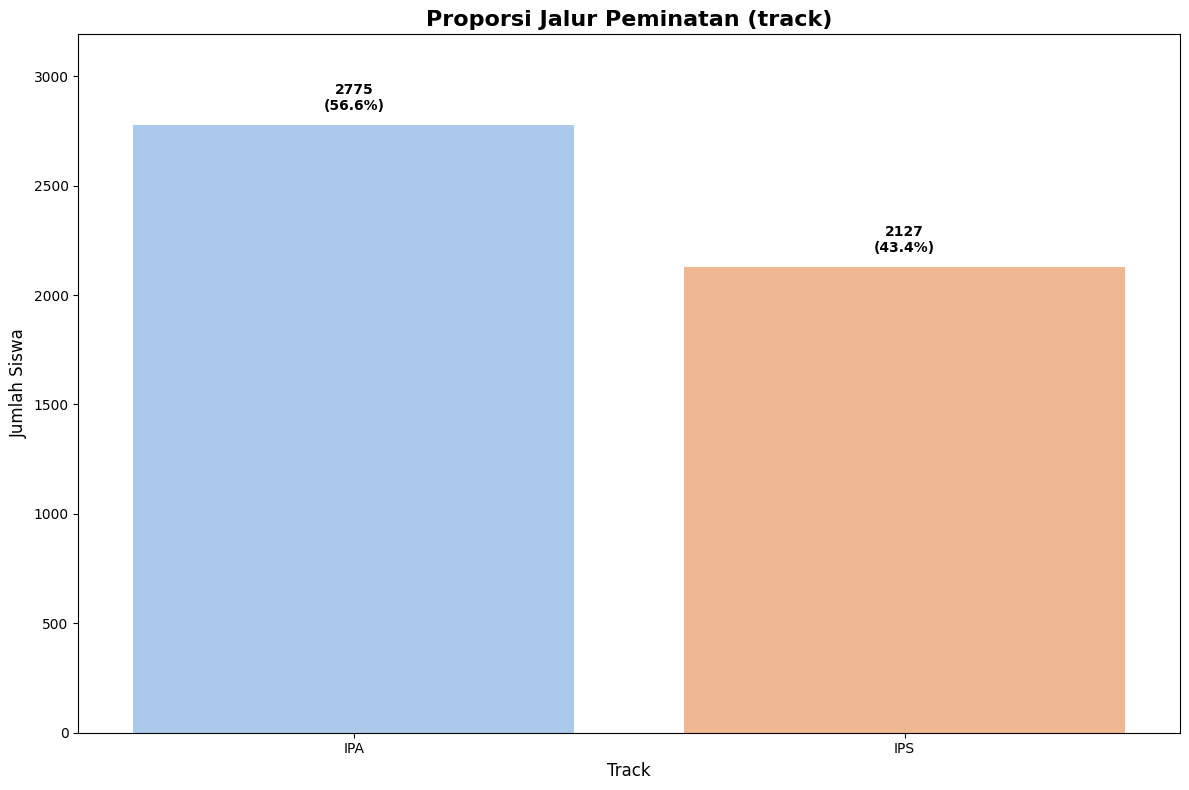

In [11]:
track_counts = df_student['track'].value_counts().sort_index()
total = track_counts.sum()
track_percentages = track_counts / total * 100

plt.figure(figsize=(12, 8))
sns.barplot(x=track_counts.index, y=track_counts.values, hue=track_counts.index, palette='pastel', legend=False)
plt.title('Proporsi Jalur Peminatan (track)', fontsize=16, fontweight='bold')
plt.xlabel('Track', fontsize=12)
plt.ylabel('Jumlah Siswa', fontsize=12)

max_count = track_counts.values.max()
plt.ylim(0, max_count * 1.15)
for i, (count, pct) in enumerate(zip(track_counts.values, track_percentages.values)):
      plt.text(i, count + max_count*0.02,
                  f"{count}\n({pct:.1f}%)",
                  ha='center',
                  va='bottom',
                  fontsize=10,
                  fontweight='semibold')
      
plt.tight_layout()
plt.show()

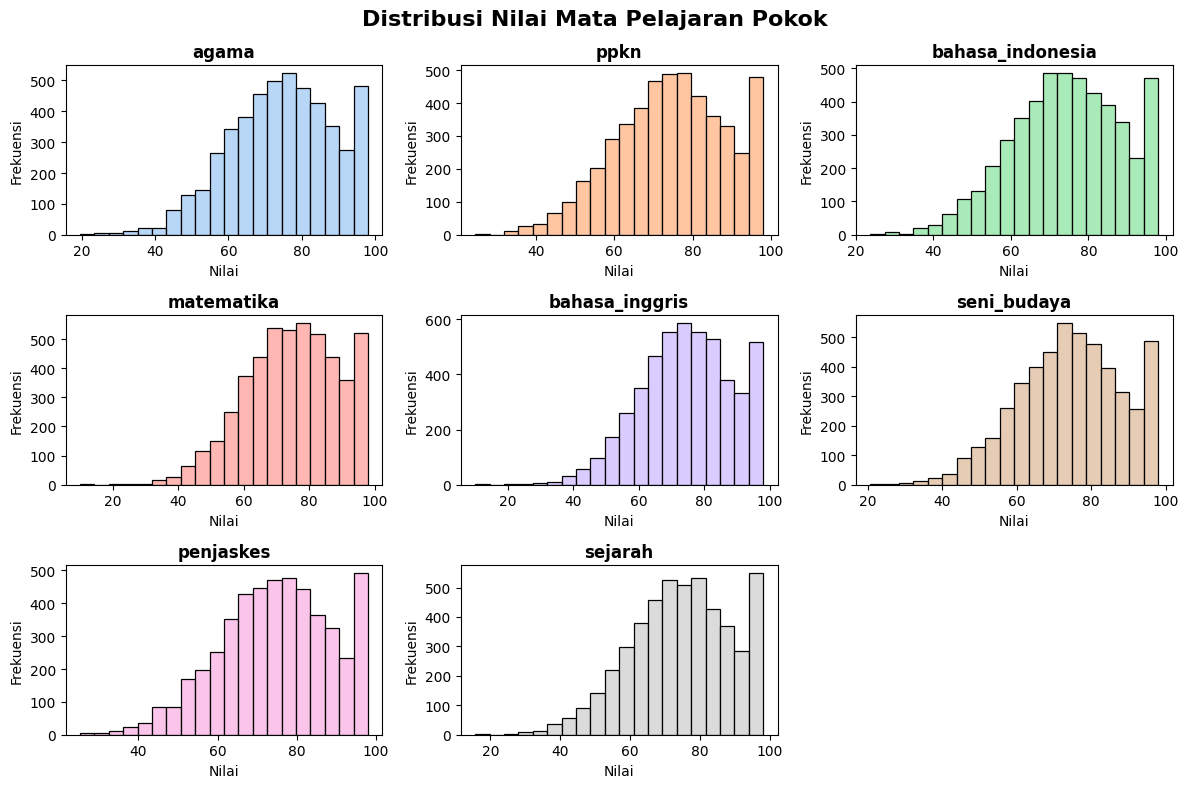

In [12]:
core_subjects = [
      'agama', 'ppkn', 'bahasa_indonesia', 'matematika', 'bahasa_inggris',
      'seni_budaya', 'penjaskes', 'sejarah'
]
palette = sns.color_palette('pastel', n_colors=len(core_subjects))
fig, axes = plt.subplots(3, 3, figsize=(12, 8))
axes = axes.flatten()

fig.suptitle('Distribusi Nilai Mata Pelajaran Pokok', fontsize=16, fontweight='bold')
for i, (col, color) in enumerate(zip(core_subjects, palette)):
      sns.histplot(df_student[col], bins=20, color=color, ax=axes[i], kde=False)
      axes[i].set_title(col, fontsize=12, fontweight='bold')
      axes[i].set_xlabel('Nilai', fontsize=10)
      axes[i].set_ylabel('Frekuensi', fontsize=10)

for j in range(len(core_subjects), len(axes)):
      fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

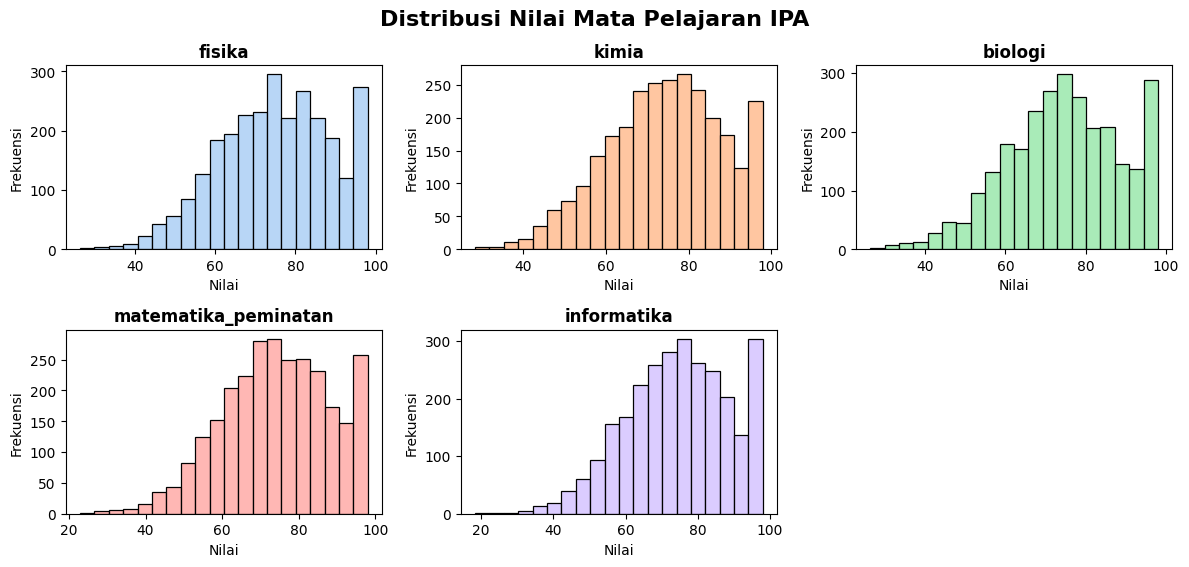

In [13]:
ipa_subjects = [
      'fisika', 'kimia', 'biologi', 'matematika_peminatan', 'informatika',
]
palette = sns.color_palette('pastel', n_colors=len(ipa_subjects))
fig, axes = plt.subplots(3, 3, figsize=(12, 8))
axes = axes.flatten()

fig.suptitle('Distribusi Nilai Mata Pelajaran IPA', fontsize=16, fontweight='bold')
for i, (col, color) in enumerate(zip(ipa_subjects, palette)):
      sns.histplot(df_student[col], bins=20, color=color, ax=axes[i], kde=False)
      axes[i].set_title(col, fontsize=12, fontweight='bold')
      axes[i].set_xlabel('Nilai', fontsize=10)
      axes[i].set_ylabel('Frekuensi', fontsize=10)

for j in range(len(ipa_subjects), len(axes)):
      fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

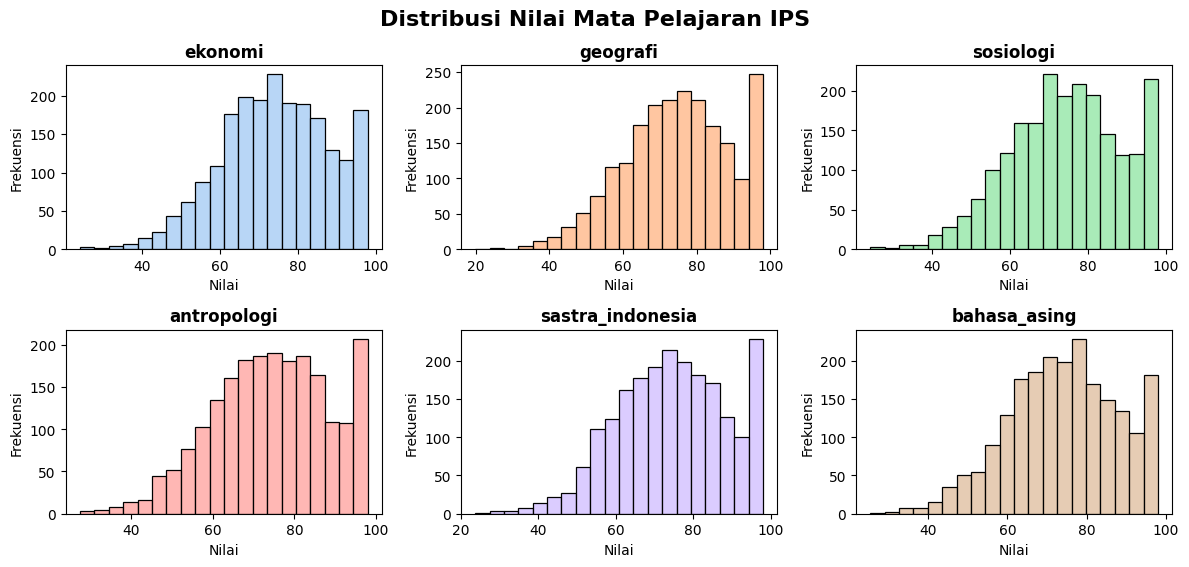

In [14]:
ips_subjects = [
      'ekonomi', 'geografi', 'sosiologi', 'antropologi', 'sastra_indonesia', 'bahasa_asing',
]

palette = sns.color_palette('pastel', n_colors=len(ips_subjects))
fig, axes = plt.subplots(3, 3, figsize=(12, 8))
axes = axes.flatten()

fig.suptitle('Distribusi Nilai Mata Pelajaran IPS', fontsize=16, fontweight='bold')
for i, (col, color) in enumerate(zip(ips_subjects, palette)):
      sns.histplot(df_student[col], bins=20, color=color, ax=axes[i], kde=False)
      axes[i].set_title(col, fontsize=12, fontweight='bold')
      axes[i].set_xlabel('Nilai', fontsize=10)
      axes[i].set_ylabel('Frekuensi', fontsize=10)

for j in range(len(ips_subjects), len(axes)):
      fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

## Data Preparation

### Feature Enginering 

#### Threshold Passing Grade

In [15]:
def add_passing_grade(df_students: pd.DataFrame,
                        df_majors: pd.DataFrame,
                        pct: float = 75.0,
                        related_col: str = 'related_subjects') -> pd.Series:
      """
      Hitung persentil rata-rata nilai siswa untuk setiap major,
      lalu kembalikan Series passing_grade.
      """
      thresholds = []
      for _, mj in df_majors.iterrows():
            rel = [s.strip().lower().replace(' ', '_')
                  for s in mj[related_col].split(';')]
            
            cols = [c for c in df_students.columns if c in rel]
            
            if not cols:
                  thresholds.append(np.nan)
                  continue
            
            avg_scores = df_students[cols].mean(axis=1)
            value = np.percentile(avg_scores.dropna(), pct)
            thresholds.append(round(value, 2))
            
      return pd.Series(thresholds, name='passing_grade')

df_major['passing_grade'] = add_passing_grade(df_student, df_major, pct=75)

In [16]:
df_major.sort_values(by='passing_grade', ascending=False)

code                major                                         faculty  \
11  A12         S1 Psikologi                              Fakultas Psikologi   
15  A16    S1 Teknik Elektro                     Fakultas Teknologi Industri   
18  A19   S1 Sastra Tiongkok                      Fakultas Sastra dan Budaya   
3    A4           S1 Farmasi             Fakultas Ilmu Kesehatan dan Farmasi   
16  A17     S1 Agroteknologi                     Fakultas Teknologi Industri   
14  A15      S1 Teknik Mesin                     Fakultas Teknologi Industri   
7    A8   S1 Desain Interior           Fakultas Teknik Sipil dan Perencanaan   
13  A14       S1 Informatika                     Fakultas Teknologi Industri   
0    A1        S1 Kedokteran                             Fakultas Kedokteran   
6    A7      S1 Teknik Sipil           Fakultas Teknik Sipil dan Perencanaan   
5    A6        S1 Arsitektur           Fakultas Teknik Sipil dan Perencanaan   
17  A18    S1 Sastra Inggris                      Fakultas Sastra dan Budaya   
12  A13   S1 Teknik Industri                     Fakultas Teknologi Industri   
4    A5         S1 Kebidanan             Fakultas Ilmu Kesehatan dan Farmasi   
2    A3   S1 Sistem Komputer  Fakultas Ilmu Komputer dan Teknologi Informasi   
1    A2  S1 Sistem Informasi  Fakultas Ilmu Komputer dan Teknologi Informasi   
20  A21   S1 Ilmu Komunikasi                        Fakultas Ilmu Komunikasi   
9   A10         S1 Akuntansi                                Fakultas Ekonomi   
19  A20        S1 Pariwisata                      Fakultas Sastra dan Budaya   
8    A9         S1 Manajemen                                Fakultas Ekonomi   
10  A11   S1 Ekonomi Syariah                                Fakultas Ekonomi   

   track_type                                   related_subjects  \
11        IPS                         sosiologi;bahasa_indonesia   
15        IPA                      fisika;matematika;informatika   
18        IPS     bahasa_asing;bahasa_indonesia;sastra_indonesia   
3         IPA                           kimia;biologi;matematika   
16        IPA                       biologi;kimia;bahasa_inggris   
14        IPA       fisika;kimia;matematika_peminatan;matematika   
7         IPS              seni_budaya;bahasa_indonesia;geografi   
13        IPA  fisika;matematika_peminatan;informatika;bahasa...   
0         IPA                biologi;kimia;fisika;bahasa_inggris   
6         IPA                             fisika;matematika;ppkn   
5         IPA                      matematika;fisika;seni_budaya   
17        IPS   bahasa_inggris;bahasa_indonesia;sastra_indonesia   
12        IPA  fisika;kimia;matematika_peminatan;informatika;...   
4         IPA                      kimia;biologi;matematika;ppkn   
2         IPA            informatika;matematika_peminatan;fisika   
1         IPA            fisika;matematika_peminatan;informatika   
20        IPS               bahasa_inggris;bahasa_indonesia;ppkn   
9         IPS             ekonomi;matematika;bahasa_inggris;ppkn   
19        IPS               geografi;bahasa_inggris;ppkn;sejarah   
8         IPS           ekonomi;matematika;bahasa_indonesia;ppkn   
10        IPS                         ekonomi;ppkn;sejarah;agama   

    passing_grade  
11          83.30  
15          82.20  
18          82.09  
3           82.03  
16          81.70  
14          81.36  
7           81.20  
13          81.10  
0           81.02  
6           81.02  
5           81.00  
17          81.00  
12          80.85  
4           80.39  
2           80.33  
1           80.33  
20          80.23  
9           80.19  
19          80.10  
8           80.05  
10          79.87

In [17]:
df_major.to_csv('Datasets/ug_majors_with_passing_grade.csv', index=False)

#### Recommended Major

In [18]:
def compute_major_score(student_row: pd.Series, major_subjects: list[str]) -> float:
      """Return mean score of the given related_subjects for one student."""
      vals = [student_row[subj] 
                  for subj in major_subjects 
                  if pd.notna(student_row.get(subj))]
      return np.mean(vals) if vals else np.nan

recommended_codes = []
for _, student in df_student.iterrows():
      track = student['track'].upper()
      best_score = -np.inf
      best_code  = None

      df_track = df_major[df_major['track_type'] == track]

      for _, mj in df_track.iterrows():
            subjects = [s.strip() for s in mj['related_subjects'].split(';')]
            
            score = compute_major_score(student, subjects)
            
            pg = mj['passing_grade']
            if not np.isnan(score) and score >= pg:
                  if score > best_score:
                        best_score = score
                        best_code  = mj['code']
      
      recommended_codes.append(best_code)

df_student['recommended_major'] = recommended_codes

In [19]:
counts_df = (
      df_student['recommended_major']
      .value_counts(dropna=False)
      .rename_axis('recommended_major')
      .reset_index(name='count')
      .sort_values('count', ascending=False)
      .reset_index(drop=True)
)

counts_df

recommended_major  count
0               None   1613
1                A12    288
2                 A2    255
3                A17    254
4                 A6    243
5                 A7    219
6                 A8    210
7                 A4    207
8                A11    164
9                A16    161
10               A10    157
11               A20    153
12               A19    146
13               A18    142
14               A21    141
15               A14    114
16                A5    110
17                A9     98
18               A15     95
19                A1     88
20                A3     35
21               A13      9

### Mapping Track

In [20]:
df_student['track_bin'] = df_student['track'].map({'IPA': 1, 'IPS': 0}).astype(int)

final_df = df_student.drop(columns=['student_id','track'])

final_df.head(500)

agama  ppkn  bahasa_indonesia  matematika  bahasa_inggris  seni_budaya  \
0     66.9  39.1              63.2        63.4            75.4         94.9   
1     91.0  76.9              76.7        81.1            77.3         79.2   
2     77.6  56.1              76.9        87.2            85.2         83.9   
3     60.7  36.9              83.3        76.2            70.6         92.5   
4     98.0  69.7              71.8        76.5            58.2         63.6   
..     ...   ...               ...         ...             ...          ...   
495   61.6  69.3              70.2        89.6            77.8         89.2   
496   98.0  66.8              53.0        41.2            59.8         52.2   
497   53.0  62.5              79.3        53.6            52.6         89.3   
498   56.8  74.1              78.3        78.5            98.0         69.0   
499   88.0  73.9              53.6        80.0            25.2         56.1   

     penjaskes  sejarah  fisika  kimia  ...  matematika_peminatan  \
0         68.9     98.0     NaN    NaN  ...                   NaN   
1         73.1     95.6    71.4   58.2  ...                  68.7   
2         85.2     88.9     NaN    NaN  ...                   NaN   
3         71.3     53.0     NaN    NaN  ...                   NaN   
4         78.5     69.1    64.1   71.6  ...                  63.8   
..         ...      ...     ...    ...  ...                   ...   
495       92.1     89.3    77.9   64.1  ...                  86.3   
496       98.0     68.5    71.7   59.7  ...                  77.9   
497       70.7     74.8    98.0   81.6  ...                  75.2   
498       85.1     83.4    95.1   84.6  ...                  74.3   
499       84.4     91.1    97.3   61.9  ...                  81.9   

     informatika  ekonomi  sosiologi  geografi  antropologi  sastra_indonesia  \
0            NaN     59.7       80.3      50.8         67.4              77.6   
1           83.5      NaN        NaN       NaN          NaN               NaN   
2            NaN     64.8       90.5      34.1         98.0              63.2   
3            NaN     73.4       61.4      67.9         71.7              68.7   
4           88.4      NaN        NaN       NaN          NaN               NaN   
..           ...      ...        ...       ...          ...               ...   
495         80.7      NaN        NaN       NaN          NaN               NaN   
496         90.9      NaN        NaN       NaN          NaN               NaN   
497         57.3      NaN        NaN       NaN          NaN               NaN   
498         65.9      NaN        NaN       NaN          NaN               NaN   
499         90.1      NaN        NaN       NaN          NaN               NaN   

     bahasa_asing  recommended_major track_bin  
0            64.4               None         0  
1             NaN               None         1  
2            54.8                A12         0  
3            64.8                 A8         0  
4             NaN               None         1  
..            ...                ...       ...  
495           NaN                 A6         1  
496           NaN               None         1  
497           NaN               None         1  
498           NaN                 A1         1  
499           NaN                 A3         1  

[500 rows x 21 columns]

In [21]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4902 entries, 0 to 4901
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   agama                 4902 non-null   float64
 1   ppkn                  4902 non-null   float64
 2   bahasa_indonesia      4902 non-null   float64
 3   matematika            4902 non-null   float64
 4   bahasa_inggris        4902 non-null   float64
 5   seni_budaya           4902 non-null   float64
 6   penjaskes             4902 non-null   float64
 7   sejarah               4902 non-null   float64
 8   fisika                2775 non-null   float64
 9   kimia                 2775 non-null   float64
 10  biologi               2775 non-null   float64
 11  matematika_peminatan  2775 non-null   float64
 12  informatika           2775 non-null   float64
 13  ekonomi               2127 non-null   float64
 14  sosiologi             2127 non-null   float64
 15  geografi             

### Label Encoder

In [22]:
le = LabelEncoder().fit(final_df['recommended_major'])
classes = list(le.classes_)

In [23]:
classes

['A1',
 'A10',
 'A11',
 'A12',
 'A13',
 'A14',
 'A15',
 'A16',
 'A17',
 'A18',
 'A19',
 'A2',
 'A20',
 'A21',
 'A3',
 'A4',
 'A5',
 'A6',
 'A7',
 'A8',
 'A9',
 None]

### Numerical Feature

In [24]:
feature_cols = core_subjects + ipa_subjects + ips_subjects

X = final_df[feature_cols]
y_idx = le.transform(final_df['recommended_major'])

### Split Data

In [25]:
X_train, X_temp, y_train, y_temp = train_test_split(
      X, y_idx, train_size=0.70, stratify=y_idx, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
      X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42
)

print(f"Train: {len(X_train)} samples")
print(f"Validation: {len(X_val)} samples")
print(f"Test: {len(X_test)} samples")

Train: 3431 samples
Validation: 735 samples
Test: 736 samples


### Simple Imputer and Standard Scaler

In [26]:
num_pipe = Pipeline([
      ('imputer', SimpleImputer(strategy='mean')),
      ('scaler',  StandardScaler())
])

X_train_scaled = num_pipe.fit_transform(X_train)
X_test_scaled  = num_pipe.transform(X_test)
X_val_scaled = num_pipe.transform(X_val)

## Modeling

### Neural Network Keras Sequential

In [27]:
model = Sequential([
      Input(shape=(X_train_scaled.shape[1],)),
      Dense(64, activation='relu'),
      Dropout(0.3),
      Dense(32, activation='relu'),
      Dropout(0.2),
      Dense(len(classes), activation='softmax'),
])

In [28]:
model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 22)             │           726 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,086 (15.96 KB)

 Trainable params: 4,086 (15.96 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
callbacks = EarlyStopping(
      monitor='val_loss',
      patience=5,
      restore_best_weights=True
)

history = model.fit(
      X_train_scaled, y_train,
      validation_split=0.15,
      validation_data=(X_val_scaled, y_val),
      epochs=100,
      batch_size=32,
      callbacks=[callbacks],
      verbose=1
)

Epoch 1/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2236 - loss: 2.9302 - val_accuracy: 0.3293 - val_loss: 2.3636
Epoch 2/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3492 - loss: 2.3817 - val_accuracy: 0.4150 - val_loss: 2.0516
Epoch 3/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3963 - loss: 2.1080 - val_accuracy: 0.4980 - val_loss: 1.7801
Epoch 4/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4424 - loss: 1.9239 - val_accuracy: 0.5456 - val_loss: 1.5410
Epoch 5/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4913 - loss: 1.6983 - val_accuracy: 0.6000 - val_loss: 1.3449
Epoch 6/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5310 - loss: 1.5195 - val_accuracy: 0.6435 - val_loss: 1.2030
Epoch 7/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5686 - loss: 1.3826 - val_accuracy: 0.6816 - val_loss: 1.0910
Epoch 8/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5616 - loss: 1.3483 - val_accu

In [30]:
loss, acc = model.evaluate(X_test_scaled, y_test, verbose=0)

y_pred_proba = model.predict(X_test_scaled)
y_pred_idx   = y_pred_proba.argmax(axis=1)

print(f"Test accuracy (Keras Sequential): {acc:.4f}")
print(classification_report(
      y_test,
      y_pred_idx,
))

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Test accuracy (Keras Sequential): 0.8370
              precision    recall  f1-score   support

           0       0.50      0.54      0.52        13
           1       0.95      0.75      0.84        24
           2       0.88      0.84      0.86        25
           3       0.82      0.93      0.87        43
           4       0.00      0.00      0.00         1
           5       0.73      0.65      0.69        17
           6       0.69      0.79      0.73        14
           7       0.80      0.83      0.82        24
           8       0.89      0.82      0.85        38
           9       0.84      0.73      0.78        22
          10       0.88      0.64      0.74        22
          11       0.84      0.82      0.83        39
          12       0.95      0.83      0.88        23
          13       0.90      0.86      0.88        21
          14       0.00      0.00      0.00         5
          15       0.87      0.87      0.87        31


In [31]:
print("Train accuracy (Keras Sequential):", model.evaluate(X_train_scaled, y_train))
print(f"Test accuracy (Keras Sequential): {acc:.4f}")

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - accuracy: 0.9032 - loss: 0.3861
Train accuracy (Keras Sequential): [0.38387569785118103, 0.9035266637802124]
Test accuracy (Keras Sequential): 0.8370


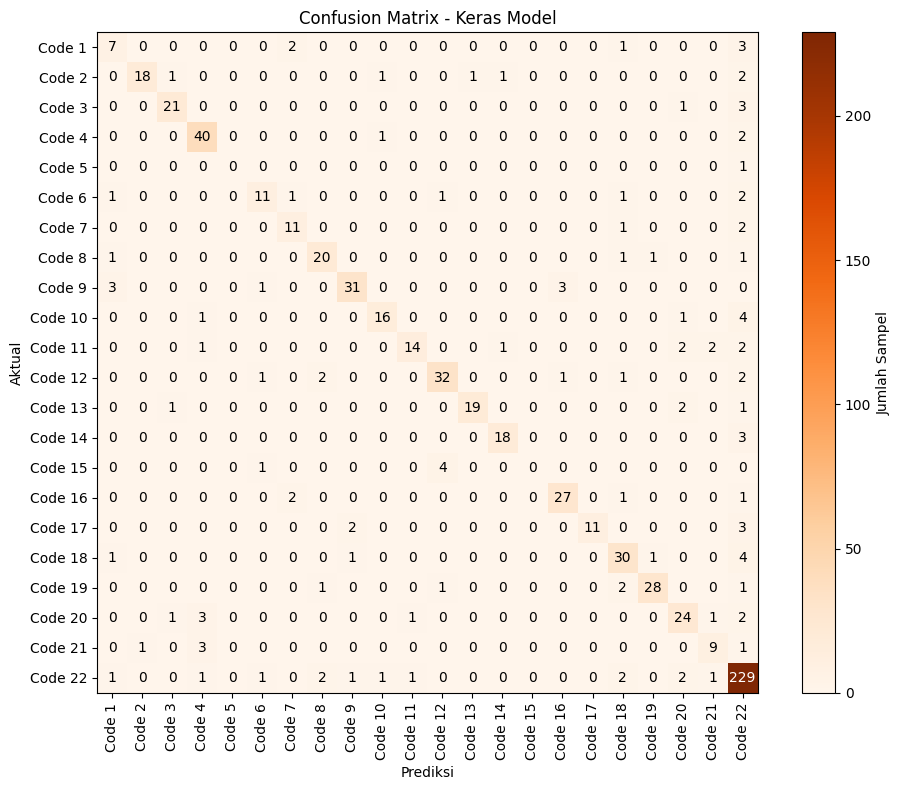

In [32]:
cm = confusion_matrix(y_test, y_pred_idx, labels=range(len(classes)))

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(cm, cmap='Oranges')

cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Jumlah Sampel')

classes = [f'Code {i+1}' for i in range(len(classes))]
ax.set_xticks(range(len(classes)))
ax.set_yticks(range(len(classes)))
ax.set_xticklabels(classes, rotation=90)
ax.set_yticklabels(classes)

ax.set_xlabel('Prediksi')
ax.set_ylabel('Aktual')
ax.set_title('Confusion Matrix - Keras Model')

thresh = cm.max() / 2
for i in range(cm.shape[0]):
      for j in range(cm.shape[1]):
            color = 'white' if cm[i, j] > thresh else 'black'
            ax.text(j, i, format(cm[i, j], 'd'),
                  ha='center', va='center', color=color)
plt.tight_layout()
plt.show()

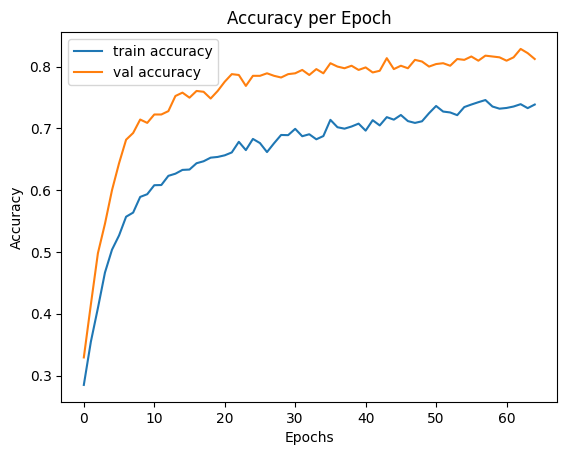

In [33]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.title('Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

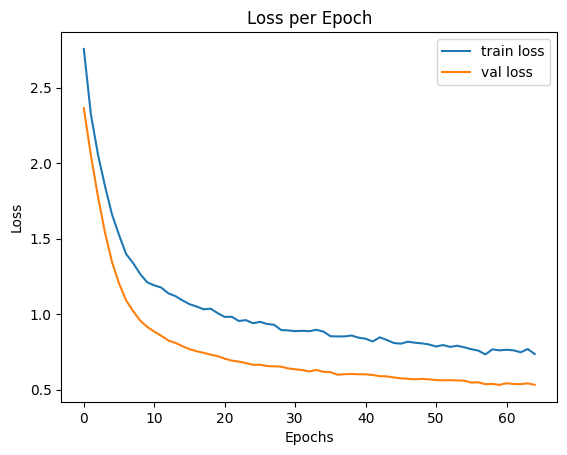

In [34]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

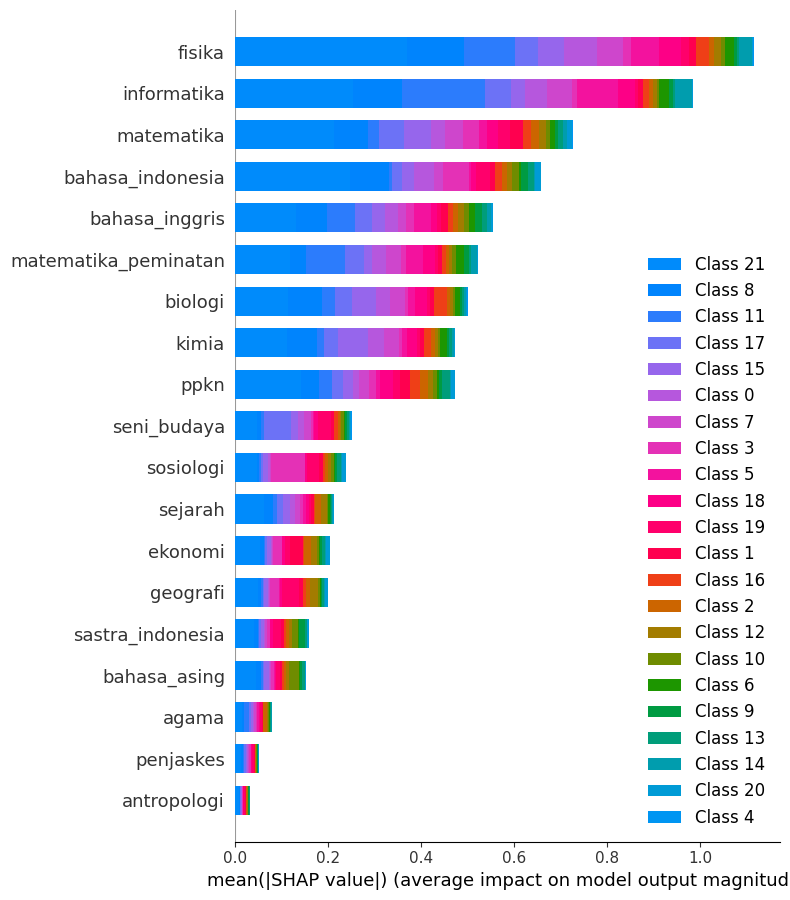

In [35]:
explainer = shap.DeepExplainer(model, X_train_scaled[:100])

shap_values = explainer.shap_values(X_test_scaled[:100])
shap.summary_plot(shap_values, X_test_scaled[:100], feature_names=feature_cols, plot_type='bar')

In [36]:
# Pilih satu contoh untuk interpretasi
idx = 1

explainer_lime = LimeTabularExplainer(
      training_data=X_train_scaled,
      feature_names=feature_cols,
      class_names=classes,
      mode='classification'
)

exp = explainer_lime.explain_instance(
      data_row=X_test_scaled[idx],
      predict_fn=model.predict,
      num_features=5
)
# Visualisasikan hasil LIME
exp.show_in_notebook(show_table=True, show_all=False)


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step


In [37]:
# Save scaler
joblib.dump(num_pipe, 'Models/num_pipe.pkl')
print("Imputer and Scaler saved as 'num_pipe.pkl'")

# Save label encoder
joblib.dump(le, 'Models/label_encoder.pkl')
print("Label Encoder saved as 'label_encoder.pkl'")

# Simpan model Keras
model.save("Models/student_major_recommendation_model.keras")
print("Model Keras Sequential saved as 'student_major_recommendation_model.keras'")

Imputer and Scaler saved as 'num_pipe.pkl'
Label Encoder saved as 'label_encoder.pkl'
Model Keras Sequential saved as 'student_major_recommendation_model.keras'


## Tuning Model

### RandomizedSearchCV

In [40]:
def build_model(
      optimizer="adam",
      activation="relu",
      dropout_rate=0.3,
      first_units=64,
      second_units=32,
      learning_rate=1e-3
      ):
      model = Sequential([
            Input(shape=(X_train_scaled.shape[1],)),
            Dense(first_units, activation=activation),
            Dropout(dropout_rate),
            Dense(second_units, activation=activation),
            Dropout(dropout_rate),
            Dense(len(classes), activation="softmax"),
      ])
      
      optim = {
            "adam":    Adam(learning_rate=learning_rate),
            "rmsprop": RMSprop(learning_rate=learning_rate)
      }[optimizer]
      
      model.compile(
            optimizer=optim,
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"]
      )
      return model

keras_clf = KerasClassifier(
      model       = build_model,
      validation_split = 0.15,
      epochs      = 100,
      batch_size  = 32,
      callbacks   = [EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)],
      verbose     = 1,
)

param_dist = {
      "model__optimizer":      ["adam", "rmsprop"],
      "model__learning_rate":  [1e-2, 1e-3, 1e-4],
      "model__activation":     ["relu", "elu", "gelu", "tanh"],
      "model__dropout_rate":   [0.2, 0.3, 0.4],
      "model__first_units":    [64, 128],
      "model__second_units":   [32, 64],
      "batch_size":            [16, 32]
}

best_params_overall = None
best_score = 0

random_search = RandomizedSearchCV(
      estimator = keras_clf,
      param_distributions = param_dist,
      n_iter = 200,
      cv = 5,
      scoring = "accuracy",
      random_state = 42,
      return_train_score = True,
      verbose = 1,
      n_jobs = -1,
)

random_search.fit(X_train_scaled, y_train)

best_score = random_search.best_score_
best_params_overall = random_search.best_params_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Epoch 1/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2251 - loss: 2.7421 - val_accuracy: 0.5495 - val_loss: 1.6057
Epoch 2/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5543 - loss: 1.5563 - val_accuracy: 0.6350 - val_loss: 1.1882
Epoch 3/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6522 - loss: 1.1849 - val_accuracy: 0.6913 - val_loss: 0.9638
Epoch 4/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6660 - loss: 1.0336 - val_accuracy: 0.7223 - val_loss: 0.8420
Epoch 5/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7111 - loss: 0.8985 - val_accuracy: 0.7476 - val_loss: 0.7757
Epoch 6/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7105 - loss: 0.8817 - val_accuracy: 0.7495 - val_loss: 0.7089
Epoch 7/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7313 - loss: 0.7900 - val_accuracy: 0.7670 - val_loss: 0.6893
Epoch 8/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/s

In [41]:
print("Best parameters:", best_params_overall)
print("Best CV score:", best_score)

best_model = random_search.best_estimator_.model_
best_model.save("Models/best_student_major_recommendation_model.keras")
print("Model Hasil Tuning disimpan sebagai 'best_student_major_recommendation_model.keras'")

Best parameters: {'model__second_units': 64, 'model__optimizer': 'adam', 'model__learning_rate': 0.001, 'model__first_units': 128, 'model__dropout_rate': 0.2, 'model__activation': 'elu', 'batch_size': 32}
Best CV score: 0.8251195674776459
Model Hasil Tuning disimpan sebagai 'best_student_major_recommendation_model.keras'


In [42]:
best_keras_clf = random_search.best_estimator_
y_proba_keras = best_keras_clf.predict_proba(X_test_scaled)
y_pred_idx = np.argmax(y_proba_keras, axis=1)

print(f"Test Accuracy (Hyper Parameter): {accuracy_score(y_test, y_pred_idx):.4f}")
print(classification_report(
      y_test,
      y_pred_idx,
))

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Test Accuracy (Hyper Parameter): 0.8478
              precision    recall  f1-score   support

           0       0.56      0.69      0.62        13
           1       0.90      0.75      0.82        24
           2       0.92      0.88      0.90        25
           3       0.82      0.95      0.88        43
           4       0.00      0.00      0.00         1
           5       0.80      0.71      0.75        17
           6       0.73      0.57      0.64        14
           7       0.75      0.88      0.81        24
           8       0.85      0.92      0.89        38
           9       0.78      0.82      0.80        22
          10       0.82      0.64      0.72        22
          11       0.81      0.87      0.84        39
          12       0.76      0.96      0.85        23
          13       0.86      0.86      0.86        21
          14       0.00      0.00      0.00         5
          15       1.00      0.94      0.97        31
 

In [43]:
print("Train accuracy (Hyper Parameter):", best_model.evaluate(X_train_scaled, y_train))
print(f"Test accuracy (Hyper Parameter): {accuracy_score(y_test, y_pred_idx):.4f}")

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - accuracy: 0.9125 - loss: 0.3019
Train accuracy (Hyper Parameter): [0.3247619867324829, 0.9052754044532776]
Test accuracy (Hyper Parameter): 0.8478


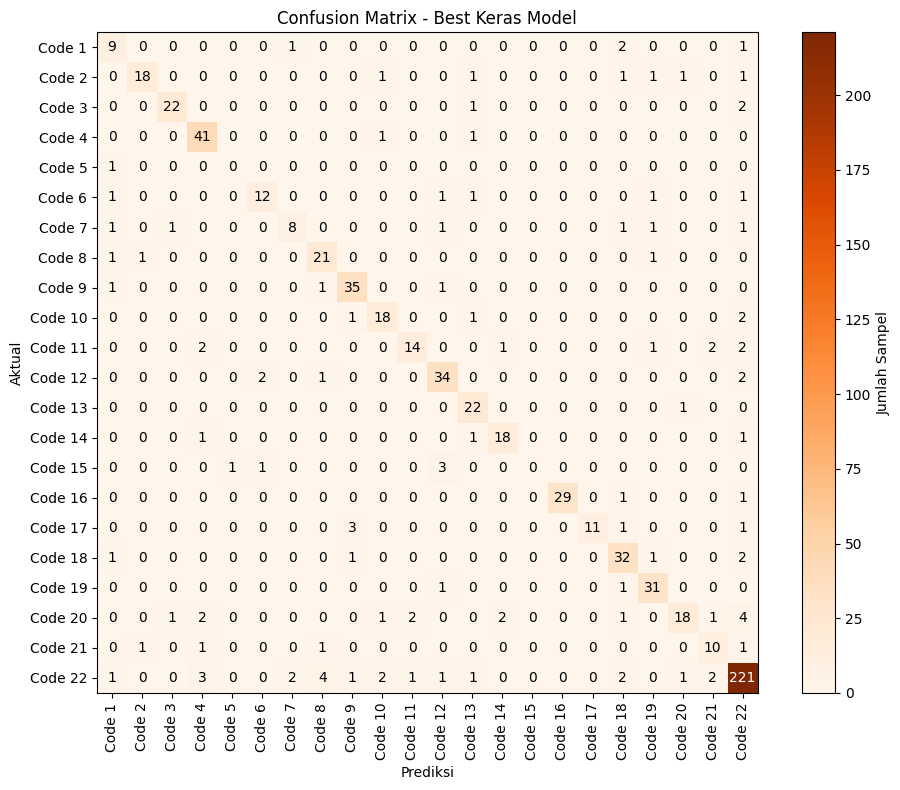

In [44]:
cm = confusion_matrix(y_test, y_pred_idx, labels=range(len(classes)))

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(cm, cmap='Oranges')

cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Jumlah Sampel')

classes = [f'Code {i+1}' for i in range(len(classes))]
ax.set_xticks(range(len(classes)))
ax.set_yticks(range(len(classes)))
ax.set_xticklabels(classes, rotation=90)
ax.set_yticklabels(classes)

ax.set_xlabel('Prediksi')
ax.set_ylabel('Aktual')
ax.set_title('Confusion Matrix - Best Keras Model')

thresh = cm.max() / 2
for i in range(cm.shape[0]):
      for j in range(cm.shape[1]):
            color = 'white' if cm[i, j] > thresh else 'black'
            ax.text(j, i, format(cm[i, j], 'd'),
                  ha='center', va='center', color=color)
            
plt.tight_layout()
plt.show()

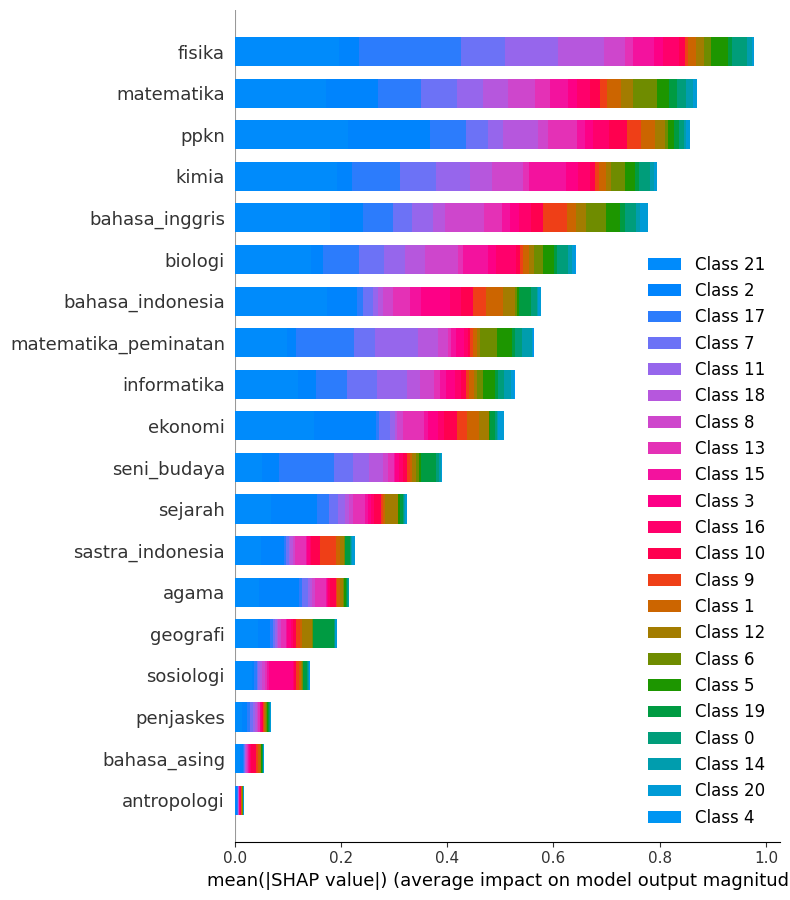

In [45]:
explainer = shap.DeepExplainer(best_model, X_train_scaled[:100])

shap_values = explainer.shap_values(X_test_scaled[:100])
shap.summary_plot(shap_values, X_test_scaled[:100], feature_names=feature_cols, plot_type='bar')

## Interpretasi Best Model

In [46]:
best_model = load_model('Models/best_student_major_recommendation_model.keras')
label_encoder = joblib.load('Models/label_encoder.pkl')
scaler = joblib.load('Models/num_pipe.pkl')

In [47]:
student_info = X_test.iloc[idx]
print("Informasi Siswa yang Diinterpretasi:")
for col, val in student_info.items():
      print(f"{col}: {val}")

Informasi Siswa yang Diinterpretasi:
agama: 83.6
ppkn: 92.3
bahasa_indonesia: 84.2
matematika: 68.7
bahasa_inggris: 78.8
seni_budaya: 71.4
penjaskes: 66.2
sejarah: 64.1
fisika: nan
kimia: nan
biologi: nan
matematika_peminatan: nan
informatika: nan
ekonomi: 65.4
geografi: 79.9
sosiologi: 63.4
antropologi: 54.7
sastra_indonesia: 62.0
bahasa_asing: 88.3


In [48]:
explainer_lime = LimeTabularExplainer(
      training_data=X_train_scaled,
      feature_names=feature_cols,
      class_names=classes,
      mode='classification'
)

exp = explainer_lime.explain_instance(
      data_row=X_test_scaled[idx],
      predict_fn=best_model.predict,
      num_features=5
)
exp.show_in_notebook(show_table=True, show_all=False)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step


In [49]:
all_features   = core_subjects + ipa_subjects + ips_subjects

def predict_major_from_input():
    print("=== Prediksi Rekomendasi Jurusan Universitas ===")
    track = input("Masukkan jurusan siswa (IPA / IPS): ").strip().upper()

    # 1) Tentukan track dan fitur aktif
    if track == 'IPA':
        track_bin = 1
        active_features = core_subjects + ipa_subjects
    elif track == 'IPS':
        track_bin = 0
        active_features = core_subjects + ips_subjects
    else:
        print("❌ Track tidak valid. Gunakan 'IPA' atau 'IPS'.")
        return

    # 2) Baca input nilai, falling back ke 0.0 jika invalid
    input_data = {}
    for feat in all_features:
        if feat in active_features:
            try:
                val = float(input(f"Masukkan nilai {feat.replace('_', ' ').title()} (0-100): "))
                if not (0 <= val <= 100):
                    raise ValueError
            except ValueError:
                print(f"⚠️ Input untuk {feat} tidak valid. Menggunakan 0.0.")
                val = 0.0
        else:
            val = 0.0
        input_data[feat] = val

    input_data['track_bin'] = track_bin

    # 3) Persiapkan DataFrame dan prediksi
    df_num = pd.DataFrame(
                [{f: float(input_data[f]) for f in feature_cols}]
        ).astype(float)
    try:
        X_num = num_pipe.transform(df_num.values)
    except Exception as e:
        print("⚠️ Error saat transform input:", e)
        return

    proba = best_model.predict(X_num)
    if proba is None or len(proba) == 0 or len(proba[0]) == 0:
        print("⚠️ Model mengembalikan probabilitas kosong.")
        return

    proba = proba[0]  # shape (n_classes,)

    # 4) Filter df_major sesuai track
    desired = 'IPA' if track_bin == 1 else 'IPS'
    df_track = df_major[df_major['track_type'].str.upper() == desired].copy()
    if df_track.empty:
        print(f"⚠️ Tidak ada jurusan dengan track_type = {desired}.")
        return

    # 5) Hitung rata‑rata related_subjects
    results, underrated = [], []
    for _, row in df_track.iterrows():
        code, pg = row['code'], row['passing_grade']
        rels = [s.strip() for s in row['related_subjects'].split(';') if s.strip()]
        vals = []
        for subj in rels:
            v = float(input_data.get(subj, 0))
            if v <= 0:
                vals = []
                break
            vals.append(v)
        if not vals:
            continue

        avg_score = sum(vals) / len(vals)
        entry = {
            'code'   : code,
            'faculty': row['faculty'],
            'major'  : row['major'],
            'avg'    : avg_score,
            'pg'     : pg,
            'rel_str': ", ".join(
                subj.replace('_',' ').title()
                for subj, _ in sorted(zip(rels, vals), key=lambda x: x[1], reverse=True)
            )
        }
        if avg_score >= pg:
            results.append(entry)
        else:
            underrated.append(entry)

    # 6) Ambil top‑3 hasil dan underrated berdasar avg menurun
    results = sorted(results, key=lambda x: x['avg'], reverse=True)[:3]
    underrated = sorted(underrated, key=lambda x: x['avg'], reverse=True)[:3]

    # 7) Tampilkan
    if not results:
        print("⚠️ Tidak ada jurusan yang lolos passing grade.")
    else:
        print("\n>> Rekomendasi Lolos Passing Grade:")
        for i, r in enumerate(results, 1):
            print(f"{i}. {r['major']} (Kode: {r['code']})")
            print(f"   Fakultas       : {r['faculty']}")
            print(f"   Passing Grade  : {r['pg']:.2f}")
            print(f"   Rata‑rata mapel: {r['rel_str']} = {r['avg']:.2f}")

    return results, underrated


In [50]:
predict_major_from_input()

=== Prediksi Rekomendasi Jurusan Universitas ===
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

>> Rekomendasi Lolos Passing Grade:
1. S1 Ilmu Komunikasi (Kode: A21)
   Fakultas       : Fakultas Ilmu Komunikasi
   Passing Grade  : 80.23
   Rata‑rata mapel: Ppkn, Bahasa Indonesia, Bahasa Inggris = 85.10


([{'code': 'A21',
   'faculty': 'Fakultas Ilmu Komunikasi',
   'major': 'S1 Ilmu Komunikasi',
   'avg': 85.10000000000001,
   'pg': 80.23,
   'rel_str': 'Ppkn, Bahasa Indonesia, Bahasa Inggris'}],
 [{'code': 'A20',
   'faculty': 'Fakultas Sastra dan Budaya',
   'major': 'S1 Pariwisata',
   'avg': 78.775,
   'pg': 80.1,
   'rel_str': 'Ppkn, Geografi, Bahasa Inggris, Sejarah'},
  {'code': 'A8',
   'faculty': 'Fakultas Teknik Sipil dan Perencanaan',
   'major': 'S1 Desain Interior',
   'avg': 78.50000000000001,
   'pg': 81.2,
   'rel_str': 'Bahasa Indonesia, Geografi, Seni Budaya'},
  {'code': 'A19',
   'faculty': 'Fakultas Sastra dan Budaya',
   'major': 'S1 Sastra Tiongkok',
   'avg': 78.16666666666667,
   'pg': 82.09,
   'rel_str': 'Bahasa Asing, Bahasa Indonesia, Sastra Indonesia'}])